<a href="https://colab.research.google.com/github/Dulon18/Machine_Learning_project/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [151]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [153]:
dataset = pd.read_csv("/content/upload_DJIA_table.csv")

In [154]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [155]:
dataset.shape

(1989, 7)

In [156]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [158]:
#Statistical information
dataset.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [159]:
#cheaking missing value

dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

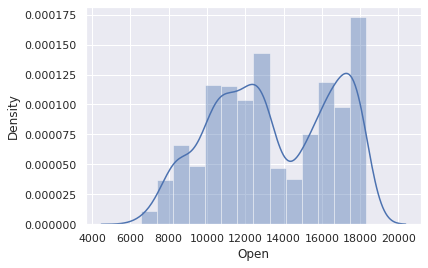

In [160]:
# Data Visualization

sns.set()
sns.distplot(dataset['Open'])


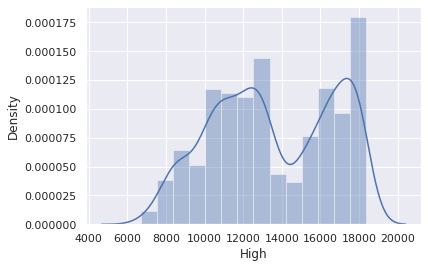

In [161]:
sns.set()
sns.distplot(dataset['High'])

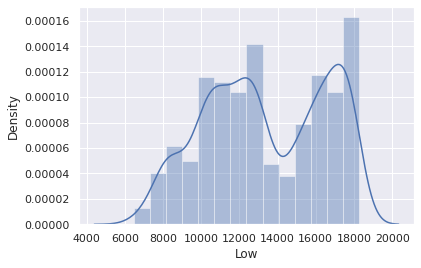

In [162]:
sns.set()
sns.distplot(dataset['Low'])

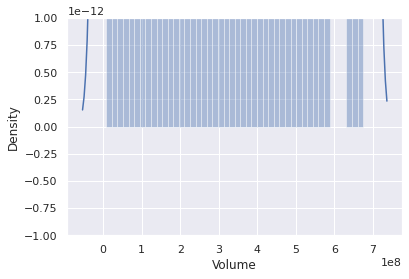

In [163]:
sns.set()
sns.distplot(dataset['Volume'])

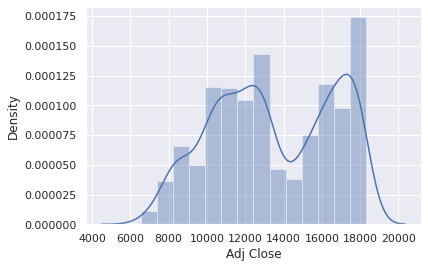

In [164]:
sns.set()
sns.distplot(dataset['Adj Close'])

In [165]:
# Finding Correlation in the dataset

correlation = dataset.corr()

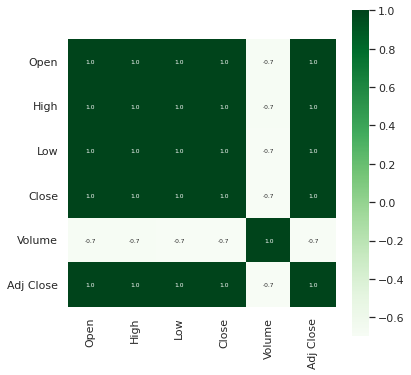

In [166]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,
            annot_kws={'size':6},cmap="Greens")

**#Separating feature and Target**

In [167]:
x = dataset.drop(columns=['Date','Adj Close'],axis=1)
y = dataset['Adj Close']


In [168]:
x

,Open,High,Low,Close,Volume
0,17924.240234,18002.380859,17916.910156,17949.369141,82160000
1,17712.759766,17930.609375,17711.800781,17929.990234,133030000
2,17456.019531,17704.509766,17456.019531,17694.679688,106380000
3,17190.509766,17409.720703,17190.509766,17409.720703,112190000
4,17355.210938,17355.210938,17063.080078,17140.240234,138740000
...,...,...,...,...,...
1984,11532.070312,11718.280273,11450.889648,11615.929688,159790000
1985,11632.809570,11633.780273,11453.339844,11532.959961,182550000
1986,11781.700195,11782.349609,11601.519531,11642.469727,173590000
1987,11729.669922,11867.110352,11675.530273,11782.349609,183190000


In [169]:
y

0       17949.369141
1       17929.990234
2       17694.679688
3       17409.720703
4       17140.240234
            ...     
1984    11615.929688
1985    11532.959961
1986    11642.469727
1987    11782.349609
1988    11734.320312
Name: Adj Close, Length: 1989, dtype: float64

In [170]:
#spliting test and training data
x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(1989, 5) (1591, 5) (398, 5)


# **Model Training**

In [171]:
model = RandomForestRegressor()

In [172]:
#training the model
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [173]:
# train data Prediction
x_train_prediction = model.predict(x_train)
print(x_train_prediction)

[17994.74029278 13486.09013712  9104.14398472 ... 17100.30334017
 16716.40736334 10938.61395498]


In [174]:
# test data Prediction
test_data_prediction=model.predict(x_test)
print(test_data_prediction)

[12769.71394531 11896.21713894 12641.77134751 17684.59658193
 10150.00683622 15327.57138661 12966.29692373 13231.64553697
  8192.41092262 13359.41269535 15332.34737296 15748.85902343
 13172.48646489  9943.78896502 16481.18824202 10569.65939456
 13170.3640234  15662.64480467 14822.86814459 12220.01376965
 16414.57627949 17762.9544918  10638.41507824 11877.46121088
 17045.31068362 17886.16292937 17052.05343755  8071.29756852
  9720.7173924  13172.35131856  9772.1370314  14541.26719711
 10308.57323238 18137.93279286 11475.54692386  8286.58416969
 11409.87695313 12981.58037114  8681.8815233  12638.99916963
 11955.75559578 16916.90802741 12662.67327137 10992.62888683
  8008.55829106 17526.65894552 12929.84335948 15128.25434584
 10605.47707041 13887.71790057 13123.88935553 10192.4584178
 12227.15169928 11193.47960966 16731.38919931 17483.91314453
 12394.24608393 18079.82916004 18236.79761699 17142.76019533
 12092.42698231 16914.13871085 16976.74876938 10141.91412108
 16369.3510841  10058.577

# Mean Absolute Error

In [147]:
m = metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error : ",m)

Mean Absolute Error :  6.3550249733921715


In [148]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.9999892638577413


# **Take Input**

In [149]:
input_data = [17946.630859,17946.630859,17356.339844,17400.75,239000000]
input_data_as_numpy_array = np.asarray(input_data)

In [150]:
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('Pridiction Price : ', prediction[0])

Pridiction Price :  17402.195644620002
